## CISC 6930: Data Mining 
Assignmnet 4
<br>
Angela Krontiris
<br>
Program used: Python
<br>
November 21, 2018

In [212]:
import pandas as pd
import numpy as np
from scipy.io import arff
%matplotlib inline

# Import 'segment.arff' file
data = arff.loadarff('segment.arff')

# Convert arff file to DataFrame
df = pd.DataFrame(data[0])

In [213]:
print("This a df of all features and class labels:\n" )
df.head()

This a df of all features and class labels:



,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,218.0,178.0,9.0,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,b'path'
1,113.0,130.0,9.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,b'foliage'
2,202.0,41.0,9.0,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,b'sky'
3,32.0,173.0,9.0,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,b'path'
4,61.0,197.0,9.0,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,b'path'


In [214]:
df['region-pixel-count'].nunique()

1

In [215]:
df.iloc[:,0:19].head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,218.0,178.0,9.0,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055
1,113.0,130.0,9.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325
2,202.0,41.0,9.0,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992
3,32.0,173.0,9.0,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886
4,61.0,197.0,9.0,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227


In [216]:
df.columns

Index(['region-centroid-col', 'region-centroid-row', 'region-pixel-count',
       'short-line-density-5', 'short-line-density-2', 'vedge-mean',
       'vegde-sd', 'hedge-mean', 'hedge-sd', 'intensity-mean', 'rawred-mean',
       'rawblue-mean', 'rawgreen-mean', 'exred-mean', 'exblue-mean',
       'exgreen-mean', 'value-mean', 'saturation-mean', 'hue-mean', 'class'],
      dtype='object')

### Function to normalize the data

In [217]:
#1)  Creating function to scale testing and training data
# This will enable us to easily scale data for each go around in LOOCV

def df_z_normalization(df):
    # Copy dataframe to normalize
    df_normalized = df.copy()

    mu = df.mean() #mean of training set
    sigma = df.std() #standard deviation for training set

    z_score_df = (df - mu)/sigma #dataframe normalized
        

    return(z_score_df)

In [218]:
# Apply the df_z_normalization function to the dataframe for each column
df_normalized = df.iloc[:,0:19].apply(df_z_normalization, axis=0)

# Fill NaN's with zero
df_normalized.fillna(0, inplace=True)

print("This is the Normalized DataFrame:")
display(df_normalized.head())


This is the Normalized DataFrame:


,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,1.275912,0.949531,0.0,2.410147,-0.19451,-0.392976,-0.115095,-0.363873,-0.130916,0.591412,0.560071,0.712983,0.469592,-0.765286,1.296198,-1.428735,0.700920,-0.472591,-0.438515
1,-0.163301,0.114514,0.0,-0.356970,-0.19451,-0.598820,-0.121713,-0.579319,-0.133963,-0.947253,-0.936767,-0.956461,-0.935919,0.865381,-0.838392,0.552706,-0.992082,2.510221,-0.492031
2,1.056604,-1.433747,0.0,-0.356970,-0.19451,-0.351806,-0.110089,-0.363873,-0.122733,2.252318,2.256706,2.196088,2.290634,-1.791637,1.472186,-0.697721,2.204955,-0.996656,-0.606356
3,-1.273551,0.862550,0.0,-0.356970,-0.19451,-0.063626,-0.087582,1.821364,-0.025407,0.171336,0.192206,0.199897,0.115158,0.050050,0.331091,-0.611153,0.180594,-0.700711,-0.411537
4,-0.876054,1.280058,0.0,-0.356970,-0.19451,-0.166549,-0.093518,0.051629,-0.107432,0.328501,0.325398,0.399006,0.243488,-0.295267,0.739842,-0.957424,0.382513,-0.542982,-0.426686


### Random Starting Positions 

In [219]:
# list of K's
K = [1,2,3,4,5,6,7,8,9,10,11,12]

# Creating list of 300 indices 
indices_list = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328, 1160, 108, 422, 88, 105, 261, 212, 1941, 1724, 704, 1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168, 566, 1812, 214, 53, 423, 50, 705, 1284, 1356, 996, 1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424, 1790, 633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1, 371, 758, 332, 542, 672, 483, 65, 92, 400, 1079, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954, 1818, 1679, 832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425, 610, 1353, 1772, 908, 1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121, 1740, 287, 1383, 1923, 1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233, 1846, 1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643, 1692, 1389, 120, 1034, 805, 266, 339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178, 774, 1623, 1641, 661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356, 541, 1455, 741, 583, 1464, 209, 1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148, 1697, 1785, 298, 1485, 945, 1097, 207, 857, 1758, 1390, 172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427, 1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628, 167, 1042, 1887, 1825, 249, 240, 524, 1098, 311, 337, 220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 613, 152, 1440, 473, 1834, 1387, 1656, 1028, 1106, 829, 1591, 1699, 1674, 947, 77, 468, 997, 611, 1776, 123, 979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442, 1588, 1033, 79, 1686, 854, 257, 1460, 1380, 495, 1701, 1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737, 1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]


# store starting position indices for k=1,..,12
indices_dict = {}

for k in K:
    centroid_indices = [indices_list[i:i + k] for i in range(0, len(indices_list), k)]
    
    #mapping each list of centroid indices to its actual k value
    indices_dict[k] = centroid_indices[0:25] #taking first 25 sublists of indices

# print(indices_dict)
# display(pd.DataFrame(indices_dict))

### Function to Extract Initial Cluster Locations



In [220]:
def initial_cluster_loc_extraction(list_of_cluster_indexes = [775, 1020], df_normalized = df_normalized):
    """Inputting a list of indexes, we will get back actual cluster locations from normalized dataframe of data.
    Note that all initialized cluster locations are an actual datapoint in our dataset."""
    
    #a) Using row indexes to extract initial cluster location for dataframe and convert to numpy array
    initial_centroid_locations_list = df_normalized.iloc[list_of_cluster_indexes,:].values
    
    return(initial_centroid_locations_list)

### Function to Calculate Distances Between Data Points & Each Cluster

In [221]:
def distances_btwn_datapoints_and_clusters(initial_centroid_locations_list, df_normalized = df_normalized):

    #2) Assign each data point to the nearest cluster
    # a) Convert df_normalized to an array
    df_matrix = df_normalized.values

    # b) Find the distances from each data point to each cluster

    master_sum_sq_list = []
    for cluster in range(len(initial_centroid_locations_list)):

        sum_sq_list = []
        for index in range(len(df_matrix)):
            sum_sq = np.sum(np.square(df_matrix[index] - initial_centroid_locations_list[cluster]))
            sum_sq_list.append(sum_sq)# appending each sum square calc to a list 

        #append 'sum_sq_list' to a 'master_sum_sq_list" where each list are all the calcs for each cluster
        master_sum_sq_list.append(sum_sq_list)

    # print(master_sum_sq_list)        
    # print(len(master_sum_sq_list))

# #     print("\n\nThis df calculates distance btwn each data point and a specific cluster\
#             (The columns indicate the specifice clusters 1, and 2):\n")
    df_dist = pd.DataFrame(master_sum_sq_list, index = np.arange(1,len(initial_centroid_locations_list)+1)).transpose()
    
    return(df_dist)



### Function to assign datapoints to appropriate clusters based on min distances

In [222]:
def cluster_assignment(distances_btwn_datapoints_and_clusters_df):
    """Given a df of distances btwn datapoints and clusters, we will assign each datapoint to 
    the nearest cluster. 'Nearest' meaning minimum distance."""
    
    #1) Returning minimum distance to each cluster for each datapoint
    #a)adding a new column in dataframe & storing min dist
    distances_btwn_datapoints_and_clusters_df['min_dist'] = distances_btwn_datapoints_and_clusters_df.min(axis=1)#(axis = 1; (to right, across row))
    
    #2) Using 'idxmin' instead of 'argmin' to return index of min value.
    ## As a reminder the position of this min value tells us the cluster to assign data point to
    distances_btwn_datapoints_and_clusters_df['cluster_label'] = distances_btwn_datapoints_and_clusters_df.idxmin(axis=1)
    
    return distances_btwn_datapoints_and_clusters_df
    

### Function to update Centroid Locations

In [223]:
def centroid_location_update(cluster_assignment_df, df_normalized = df_normalized):
    
    """Returns a list of updated centroid locations. Updated centroid locations are determined by 
    averaging all datapoints in assigned to each particular cluster."""
    
    #1) Next we need to UPDATE our CLUSTER LOCATIONS based on the data points assigned to each CLUSTER
    #Goal: we need to return all data points stored in each cluster and avg them to get an updated centroid location

    #a) Returning unique cluster labels from dataframe 
    unique_clusters = cluster_assignment_df['cluster_label'].unique()
#     print("Unique clusters:", unique_clusters)
    
    #a-1) Sorting numpy array to order the clusters labels from 1 to ... K
    unique_clusters_sorted = np.sort(unique_clusters)
#     print("These are the unique cluster labels sorted in ascending order:", unique_clusters_sorted) #unique_clusters is a numpy array

    #b) For each unique clusters we now want to return the indices of the datapoints assigned to it

    indices_for_each_cluster_master = [] #list of boolean series indicating indices to extract for a particular cluster
    for cluster_label in unique_clusters_sorted:


        #a) want to filter out and get indices of all datapoints associated with a particular cluster
        indices_for_each_cluster = cluster_assignment_df["cluster_label"] == cluster_label #cluster label is k = 1,2 all the way to K
        indices_for_each_cluster_master.append(indices_for_each_cluster)


    #excellent we have a list of boolean series indicating the indices to extract for each cluster 
#     print("\nFilter masks to extract data points for a particular cluster\n", indices_for_each_cluster_master) 

    #c) Extracting actual data points for each cluster, now that have stored in a list in step(b)
    extracted_df_of_values_for_particular_cluster = []

    for cluster_indices in indices_for_each_cluster_master:
        #a) Get back original datapoints by filtering dataframe 
        # filtering normalized dataframe with all data values to return only values 
        # assigned to a particular cluster

        data_points_for_each_cluster = df_normalized[cluster_indices] 

        extracted_df_of_values_for_particular_cluster.append(data_points_for_each_cluster)

#     print("\nExtracted datapoints (stored in a df) for each cluster in a list:\n", extracted_df_of_values_for_particular_cluster)

    # print("Checking what we have stored in the list (should be dfs):", type(extracted_df_of_values_for_particular_cluster[0]))
    # excellent we have dfs stored in our list

    #d) Need to now calculate columnwise mean to get new locations for centroids

    new_centroid_locations_master = []
    for data_points_df_in_each_cluster in extracted_df_of_values_for_particular_cluster:

        #a) convert each dataframe into a a numpy array
        data_points_as_np = data_points_df_in_each_cluster.values

        #b) Taking columnwise mean for all data points in each cluster
        new_centroid_location = np.mean(data_points_as_np, axis = 0) #axis = 0: (downward, column)
        new_centroid_locations_master.append(new_centroid_location)

    
    return (new_centroid_locations_master, extracted_df_of_values_for_particular_cluster)


### Function to Calculate SSE

In [224]:
def SSE_calc(new_centroids, within_cluster_points_df):
    """ Calculates each SSE for each cluster location and stores results in a list."""
    
    master_SSE_for_each_cluster_list = []
    for cluster_k in range(len(new_centroids)): #here we have two centroids, so operation will go around twice

        #a) subtracting dataframe values of 'within cluster points' from each new centroid location
        sse_diff_and_squaring = np.square(within_cluster_points_df[cluster_k].values - new_centroids[cluster_k])
    #     print("\nCheck out this subtraction and squaring for cluster 1:\n",sse_diff_and_squaring)

        #b) columnwise summing to get single SSE for each cluster
        sse_for_each_cluster = np.sum(sse_diff_and_squaring, axis = 0)
    #     print("\nTHis is the SSE for a single cluster, cluster 1:\n", sse_for_each_cluster)

        #c) append SSE for each cluster to a master list 
        master_SSE_for_each_cluster_list.append(sse_for_each_cluster)

    return(master_SSE_for_each_cluster_list)

### Setting up Structure of Program-- Kmeans SSE with nested functions

In [225]:
#1) Example of pulling out cluster indexes
# test_indices = [[775, 1020, 200, 127, 329, 1626, 1515, 651]]

def Kmeans_SSE(test_indices, df_normalized=df_normalized):
    """Function that returns converged SSE for each k and 25 random starting centroid locations"""
    for indices in test_indices:#pulling out centroid indices to look up data points

        #1) Given a particular cluster index, we need to extract actual values form our NORMALIZED DATAFRAME
        initial_centroid_locations_list = initial_cluster_loc_extraction(list_of_cluster_indexes = indices, df_normalized = df_normalized)
    #     print(initial_centroid_locations_list)

        #1-a) putting initialized centroid locations into a list
        master_centroids_after_update = [initial_centroid_locations_list]

        for iteration, centroid_combo in enumerate(master_centroids_after_update):




            # Condition when to stop running -  if new centroid = previous centroid, then stop or iterations <50 
            if iteration < 50:

                #2) Now given this list of clusters we can calculate datapoint distances to each individual cluster
                distances_to_each_cluster_df = distances_btwn_datapoints_and_clusters(initial_centroid_locations_list = centroid_combo , df_normalized = df_normalized)
        #         display(distances_to_each_cluster_df.head())

                #3) Now, based on minimum distance, we need to assign each datapoint to a particular cluster
                cluster_assignments_df = cluster_assignment(distances_btwn_datapoints_and_clusters_df=distances_to_each_cluster_df)
        #         display(cluster_assignments_df.head())  

                #4) Now that have assigned each datapoint to a cluster, we need to shift/update our centroid location for each cluster
                new_centroids, within_cluster_points_df = centroid_location_update(cluster_assignment_df = cluster_assignments_df, df_normalized = df_normalized)
#                 print("\nThese are the new centroids locations:\n\n", new_centroids)
    #             print("\nThis is are the datapoints within each cluster:\n\n", within_cluster_points_df)
    #             print(new_centroids[0])
    #             print(new_centroids[1])


                #5) brining in SSE calcuations for each cluster
                SSE_list_each_iteration = SSE_calc(new_centroids = new_centroids, within_cluster_points_df = within_cluster_points_df)
                #     print("\n\nList of SSE's calcuated for each cluster:\n", SSE_list_each_iteration)
                #__________________________

                #6) Append new_centroid locations into 'master_centroids_after_update'
                master_centroids_after_update.append(new_centroids)


#                 print("\nIteration: {}".format(iteration),"\n\n")
#                 print("Centroid combo: {}\n\n".format(iteration),centroid_combo )
#                 print("SSE: {}\n".format(iteration), SSE_list_each_iteration)




                #7) calculating difference btween new and old centriods to see if need to break out of loop
    #             print("\n\nNew centroids:\n\n", new_centroids)
    #             print("\n\nPast centroid:\n\n", master_centroids_after_update[iteration])
    #             print("\n\nNew Centroid - Past centroid:\n\n",new_centroids - np.array(master_centroids_after_update[iteration]) <.01)

                if np.all(new_centroids - np.array(master_centroids_after_update[iteration]) <.001):

#                     print("\n\nWe have convergence on iteration {}!".format(iteration))
#                     print("\n\nSubtraction(new-old<.001):\n\n",new_centroids - np.array(master_centroids_after_update[iteration]) <.001 )
                    converged_sse = np.sum(SSE_list_each_iteration)
#                     print("Converged SSE:\n",converged_sse)
                    break




            else:
#                 print("\n\nFifty iterations were run!\n")
                converged_sse = np.sum(SSE_list_each_iteration)
#                 print("Converged SSE max:\n",converged_sse)
                break

            iteration = iteration + 1 #iteration counter

    # print("This is the entire list of centroids after each update step:\n\n",master_centroids_after_update)


    return converged_sse



In [226]:
# print(indices_dict)
sse_dict = {}

for index, k_25_indices in indices_dict.items():
#     print( '\n', k_25_indices )
    
    sublist_master = []
    for sub_list in k_25_indices:
        sub_list_list = [sub_list]
        k_means_each_run_and_cluster = Kmeans_SSE(test_indices=sub_list_list, df_normalized=df_normalized)
        sublist_master.append(k_means_each_run_and_cluster)
    
    sse_dict[index] = sublist_master
        
print(sse_dict)     

{1: [41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804, 41561.999999999804], 2: [28761.469960194365, 28761.479165964873, 28761.469960194365, 29016.494169987291, 28761.469960194365, 39340.014336122142, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.479165964873, 28761.469960194365, 28761.479165964873, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.469960194365, 28761.469960194365, 29016.494169987291, 28761.469960194365, 28761.479165964876, 28761.469960194365, 28761.4699

In [227]:
#converting sse dictionary to a dataframe
sse_dict_to_df = pd.DataFrame(sse_dict)
# display(sse_dict_to_df)

,1,2,3,4,5,6,7,8,9,10,11,12
0,41562.0,28761.469960,24505.721000,20018.646764,19634.318004,14779.042424,13232.294661,12858.199476,11990.357762,11356.709015,10783.303155,9986.041972
1,41562.0,28761.479166,24390.938035,23269.548986,19634.842455,18482.860483,14178.503068,13384.501165,12752.240848,11408.460804,12050.012674,11615.071491
2,41562.0,28761.469960,23652.304624,22317.119274,18862.129473,17919.024715,17965.395879,13609.830253,12117.179801,11161.569929,10537.347883,10891.881134
3,41562.0,29016.494170,27347.337053,23017.290621,19690.970883,15490.828482,14137.936098,12176.766556,11838.324011,12333.308146,10169.807799,10051.417546
4,41562.0,28761.469960,27080.143340,24164.340181,15818.633210,13998.887761,13671.136374,13336.371753,12682.277530,10705.500219,10574.267566,9943.344285
5,41562.0,39340.014336,24505.721000,20018.610149,15818.633210,15490.668018,13793.331580,12177.261418,11518.306978,11378.451616,10586.643318,10309.867870
6,41562.0,28761.469960,24505.721000,20018.610149,19690.970883,17880.115649,14160.199275,12344.257494,11990.357762,12892.034533,10822.652872,12032.836462
7,41562.0,28761.469960,24505.721000,19525.482620,18862.643011,14768.091387,14096.638226,12404.923069,12727.673791,11412.454737,10622.426434,9812.062917
8,41562.0,28761.469960,24505.721000,20018.712452,19219.821078,14832.183574,13232.294661,12082.488183,13185.176244,11549.888293,11465.960856,10521.736035
9,41562.0,28761.469960,24585.464241,23017.290621,15818.633210,14700.549076,14172.998965,13549.166662,11836.616069,11657.282724,10783.262953,10048.020401


,k,μk,σk,µ + 2σ,µ - 2σ
1,1,41562.000000,1.485199e-11,41562.000000,41562.000000
2,2,29205.015145,2.112634e+03,33430.283727,24979.746563
3,3,24551.016313,9.078673e+02,26366.750918,22735.281709
4,4,21157.861152,1.598800e+03,24355.461212,17960.261092
5,5,18205.595280,1.778095e+03,21761.785413,14649.405147
6,6,16052.341778,1.688840e+03,19430.021250,12674.662306
7,7,14626.526974,1.579643e+03,17785.813914,11467.240035
8,8,13161.110598,1.180318e+03,15521.745824,10800.475372
9,9,12416.079667,7.236662e+02,13863.412130,10968.747203
10,10,11542.334411,6.540337e+02,12850.401836,10234.266986


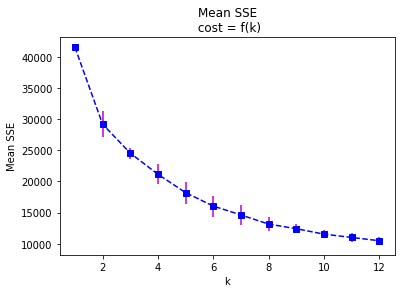

In [229]:
# Mean of the columns in sse_dict_to_dataframe
import matplotlib.pyplot as plt

# Calculate the mean of all 25 cluster runs
sse_mu_per_cluster = sse_dict_to_df.mean(axis=0)
# print("SSE μk:\n ", sse_mu_per_cluster)

# Calculate the standard deviation of all 25 cluster runs
sse_sigma_per_cluster = sse_dict_to_df.std(axis=0)
# print("\nSSE σk:\n", sse_sigma_per_cluster)

# Calculate 95% confidence interval (mu +/- 2*sigma)
sse_CI_95_plus = sse_mu_per_cluster + 2*sse_sigma_per_cluster
sse_CI_95_minus = sse_mu_per_cluster - 2*sse_sigma_per_cluster
# print("\n µ + 2σ:\n", sse_CI_95_plus)
# print("\n µ - 2σ:\n", sse_CI_95_minus)

# Create table with results
SSE_results_dict = {'k': [1,2,3,4,5,6,7,8,9,10,11,12],'μk':sse_mu_per_cluster,'σk':sse_sigma_per_cluster, 'µ + 2σ':sse_CI_95_plus,'µ - 2σ':sse_CI_95_minus}

# Convert 'SSE_results_dict' to a DataFrame
SSE_results_df = pd.DataFrame(SSE_results_dict, columns=['k','μk','σk','µ + 2σ','µ - 2σ'])
display(SSE_results_df)

# Plot the mean SSE as a function of k and the confidence interval
x0 = np.array(SSE_results_df['k'])
y = np.array(SSE_results_df['μk'])
err = np.array(SSE_results_df['σk'])

plt.errorbar(x0, y, yerr = err,fmt= "bs--", ecolor ='m' )
plt.title('Mean SSE\n cost = f(k)')
plt.ylabel('Mean SSE')
plt.xlabel('k')
plt.show()
